Project - Data Wrangling - Data Analyst Nano Degree
Elad Shahar
August 2018

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1 - Gather 

In [2]:
## Importing the dataset
# Read CSV (comma-separated) file into DataFrame
tae = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
### Downloading image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(url_response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
#3rd database - tweet_json.txt
# using Tweepy the Tweeter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Instructions for registering Twitter app and generating access tokens:
# https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: I had mobile verification issues so the following
# Twitter API code was sent to me student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = tae.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

In [6]:
# read json file into a pandas data frame
tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')


In [7]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## Stage 2 - Assess 

### data exploration dataframes

#### Our first action is to look at the dataframes using info , describe and sample 
our goal is to assess data visually and programmatically for quality and tidiness.

#### Tae dataframe

In [8]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
## Looking at the tae data itself with a random sample of 5
tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9,10,Griffin,None,None,None,None
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,None,None,None,None
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,None,None,None,None,None
1543,689557536375177216,NaN,NaN,2016-01-19 21:18:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Downright majestic af 12/10 https://t.co/WFh2F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689557536...,12,10,None,None,None,None,None
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661...,13,10,None,None,None,pupper,None


#### image predictions 

In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
## Looking at the image_predictions data itself with a random sample of 5
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1186,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire_bullterrier,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True
748,687807801670897665,https://pbs.twimg.com/media/CYuVi9pWwAAbOGC.jpg,1,Staffordshire_bullterrier,0.151113,True,boxer,0.135697,True,American_Staffordshire_terrier,0.086591,True
1659,811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True
1819,834209720923721728,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,1,golden_retriever,0.754799,True,Pekinese,0.197861,True,Labrador_retriever,0.008654,True


In [14]:
#### tweet_data dataframe

In [15]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [16]:
tweet_data.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [17]:
## Looking at the tweet_data data itself with a random sample of 5
tweet_data.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2257,NaN,NaN,2015-11-20 03:51:52,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...",0,False,RT @dogratingrating: Exceptional talent. Origi...,NaN,...,0.0,NaN,NaN,NaN,37,False,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1285,NaN,NaN,2016-03-11 18:18:36,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708356456928649216, 'id_str'...",3929,False,This is Oliver. That is his castle. He protect...,NaN,...,0.0,NaN,NaN,NaN,1520,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1309,NaN,NaN,2016-03-08 01:52:18,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 707020843742838786, 'id_str'...",4433,False,This is Tucker. He's a Dasani Episcopalian. Go...,NaN,...,0.0,NaN,NaN,NaN,1540,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
420,NaN,NaN,2017-01-19 01:04:45,"[0, 53]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821886054592552961, 'id_str'...",12582,False,This is Jimison. He was just called a good boy...,NaN,...,0.0,NaN,NaN,NaN,2692,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
451,NaN,NaN,2017-01-10 00:24:38,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 818614452752760832, 'id_str'...",10971,False,This is Bear. He's a passionate believer of th...,NaN,...,0.0,NaN,NaN,NaN,2982,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Data Tidyness
- the last four columns doggo floofer pupper and puppo should be combined into 1 column 
- Match index name and type between dataframes - all to be tweet_id of type string
- Merge the three dataframes into one master dataframe using tweet_id


## Quality issues

#### Erroneous datatypes dataframe tae
- #in_reply_to_status_id - should be string, not a non-null float64
- #in_reply_to_user_id - should be string, not a non-null float64
- #retweeted_status_id - should be string, not a non-null float64
- #retweeted_status_user_id - should be string, not a non-null float64
- #retweeted_status_timestamp - should be timedate
- #timestamp                  - should be timedate

##### - 'expanded_urls' and 'source' in tae do not provide useful information and can be removed

In [18]:
tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
tae.expanded_urls.describe()

count                                                  2297
unique                                                 2218
top       https://twitter.com/dog_rates/status/782305867...
freq                                                      2
Name: expanded_urls, dtype: object

#### Retweets and Replies
We can see clearly from the total values per columns when running tae.info()
Total observations in the dataset - 2356

Not all columns must have full data, we can see these 3 columns have 181 observations which have had retweets 
-missing retweeted_status_timestamp - 181 observations vs 2356
-missing retweeted_status_user_id -181 observations vs 2356
-missing retweeted_status_id - 181 observations vs 2356
This tells us that of the 2356 observations, 181 are retweets

Not all columns must have full data, we can see these 2 columns have 78 observations which were posted in reply to another tweet
-missing in_reply_to_status_id - 78 observations vs 2356
-missing in_reply_to_user_id - 78 observations vs 2356
This tells us that of the 2356 observations, 78 are replies

- multiple obsevations are retweets or response
it seems that  in_reply_to_status_id , in_reply_to_user_id ,retweeted_status_id ,#retweeted_status_user_id, retweeted_status_timestamp do not hold useful information beyond categorizing if the tweet is a reply or a retweet   

We will remove re-twitted rows followed by dropping columns related to retweet/reply in the cleaning stage

In [20]:
# Retweets
tae[tae['retweeted_status_id'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
tweet_id                      181 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     181 non-null object
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: float64(4), int64(3), object(10)
memor

In [21]:
# Replies 
tae[tae['in_reply_to_status_id'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      78 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     78 non-null object
source                        78 non-null object
text                          78 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 23 non-null object
rating_numerator              78 non-null int64
rating_denominator            78 non-null int64
name                          78 non-null object
doggo                         78 non-null object
floofer                       78 non-null object
pupper                        78 non-null object
puppo                         78 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 11.0+ KB

##### - text column holds useful information such as gender and can be parsed , ['his', 'he' ,'she' ,'her' , 'girl' ,'boy' ,'female' ,'male']

In [22]:
tae.text.sample(5)

1667    Meet Joey and Izzy. Joey only has one ear that...
1485    This is Dunkin. He can only see when he's wet ...
284     This is Arlo. He's officially the king of snow...
735     We normally don't rate lobsters, but this one ...
1127    "Challenge completed" \n(pupgraded to 12/10) h...
Name: text, dtype: object

##### column 'name' has wrong or missing values, 
Both 'None' and 'a' are clearly not correct dog names , running value counts I choose to add to the list to be investigated also 'An' and 'O'

In [23]:
tae['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Bailey            7
Toby              7
an                7
Buddy             7
Bella             6
Jax               6
Leo               6
Stanley           6
Oscar             6
Milo              6
Koda              6
Dave              6
Jack              6
Scout             6
Rusty             6
very              5
               ... 
Snicku            1
Julius            1
Skittle           1
Sundance          1
Rambo             1
Jarod             1
Juckson           1
unacceptable      1
Dwight            1
Gustav            1
Hazel             1
Jazz              1
Hanz              1
Bobby             1
Maks              1
Norman            1
Mac               1
Sky               1
Rupert            1


In [24]:
tae[tae.name == "a"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


-881536004380872706 name should be changed to Puffie

-792913359805018113 name should be changed to forrest

-675706639471788032 name should be changed to Wylie

-673636718965334016 name should be changed to Kip

-671743150407421952 name should be changed to Jacob

-671147085991960577 name should be changed to Rufus

-670427002554466305 name should be changed to Spork

-670361874861563904 name should be changed to Cherokee

-670303360680108032 name should be changed to Hemry

-669923323644657664 name should be changed to Alphred

-669564461267722241 name should be changed to Alfredo

-668955713004314625 name should be changed to Leroi

-668507509523615744 name should be changed to Chuk

-668171859951755264 name should be changed to Alfonso


-667861340749471744 name should be changed to Cheryl

-667773195014021121 name should be changed to Jessiga

-667538891197542400 name should be changed to Klint

-667470559035432960 name should be changed to Kohl

-667177989038297088 name should be changed to Daryl

-666983947667116034 name should be changed to Pepe

-666781792255496192 name should be changed to Octaviath

-666701168228331520 name should be changed to Johm

- All other values with 'a' as name should be changed to "None"

In [25]:
tae[tae.name == "an"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


- 668636665813057536 name should be changed to Berta

- All other values with 'an' as name should be changed to "None"

In [26]:
tae[tae.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


- 776201521193218049 name should be changed from "O" to "O'Malley"

#### - Cleaning numerator and denominator values
firstly I ran value counts on both the numerator and denominator columns
I investigated several of the outlier values to understand the reason for the extreme numerator values.
some issues are due to different scaling (meaning denominator is not the standard 10), that we can fix with standarization
the second problem is incorrect capture of the values from the text. the main problem is for tweets with decimal points which appear to be capturing only the values to the right of the decimal point.
The third issue is tweets with purposely unproportional ratio between numerator and denominator.

In [27]:
tae['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### - Checking values of rating_numerator. 

In [28]:
tae['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### assess numerator divided by denominator

In [29]:
## I decided to test assess both variables together, numerator divided by denominator. all ratios over 2 are suspect
(tae[(tae.rating_numerator /tae.rating_denominator) > 1.5]) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [30]:
## displaying tweets with denominator higher than 10
tae[tae.rating_denominator > 10] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [31]:
#example of the first issue, a tweet with denominator of 120 and numerator of 144, this would be resolved with standarization
tae[tae.tweet_id == 677716515794329600]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [32]:
#example of the second issue, numerator in the data frame only captured the values to the right of the decimal point
#instead of 11.26 only 26 was captured
tae[tae.tweet_id == 680494726643068929]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [33]:
#example of the third issue, high numerator used for artistic emphasis. here the value of 1776 is the USA's founding year
tae[tae.tweet_id == 749981277374128128]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


# Stage 3 - Clean

## Data Tidyness  

- the four dog type columns doggo floofer pupper and puppo should be combined into 1 column
- Dataframes require preparation before merge: Ensure index tweet_id is correctly named across all dataframesea and cast to the correct datatype string
- Remove columns from tweet_data_clean ahead of merging
- Merge the three dataframes into one master dataframe using tweet_id


## Data Quality 

- Correct Erroneous datatypes 
    - #in_reply_to_status_id - should be string, not a non-null float64
    - #in_reply_to_user_id - should be string, not a non-null float64
    - #retweeted_status_id - should be string, not a non-null float64
    - #retweeted_status_user_id - should be string, not a non-null float64
    - #retweeted_status_timestamp - should be timedate
    - #timestamp                  - should be timedate

- Drop columns not in use

- Remove Retweet rows

- Remove retweet and reply columns 

- Extract gender from text column

- column 'name' has wrong values, 
I chose to focus on 'None' , 'a', 'an' and 'O'. Correct the name when possible and set value to 'None' otherwise

- numerator rating incorrectly captured without digits to the left of the decimal point
Correct wrongly captured numerator_rating by using regular expression

- Dog ranking add a new variable of ranking ratio 
I will normalize the data by dividing the numerator by the denominator to create one value with the relative dogs rank

- Deal with outlier values in the new dog rank




## Tidyness issues

In [34]:
### Create a copy before cleaning
tae_clean = tae.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

In [35]:
# Set column width to allow maximum content display
pd.set_option('display.max_colwidth', -1)


### 1. Consolidate dog types into single column


#### Define
Four columns for dog type, should be consolidated into one column dog_type
When encountering multi dog types (ex. doggo puppo, which has both doggo and puppo selected), both types will be saved.

#### Clean

In [36]:
conditions = [
    ((tae_clean['doggo'] == 'doggo') & (tae_clean['puppo'] == 'puppo')) ,
    ((tae_clean['doggo'] == 'doggo') & (tae_clean['pupper'] == 'pupper')) ,
    ((tae_clean['doggo'] == 'doggo') & (tae_clean['floofer'] == 'floofer')) ,
    ((tae_clean['doggo'] == 'doggo') & (tae_clean['floofer'] == 'None') & (tae_clean['pupper'] == 'None') & (tae_clean['puppo'] == 'None')) ,
    (tae_clean['puppo'] == 'puppo') ,
    (tae_clean['pupper'] == 'pupper') ,
    (tae_clean['floofer'] == 'floofer'), 
    ((tae_clean['doggo'] == 'None') & (tae_clean['floofer'] == 'None') & (tae_clean['pupper'] == 'None') & (tae_clean['puppo'] == 'None')) ]
choices = ['doggo puppo', 'doggo pupper', 'doggo floofer', 'doggo','puppo', 'pupper', 'floofer','None']
tae_clean['dog_type'] = np.select(conditions, choices )


In [37]:
# Removing the four columns 'doggo', 'puppo', 'pupper' and 'floofer' which are no longer needed
tae_clean.drop(['pupper', 'puppo','doggo', 'floofer'], axis=1, inplace=True)

#### Test

In [38]:
# We can see that the dog_type column now holds the selected values from the four dog_type columns
# in addition we can see that most dogs are not assigned to a specific dog type, I will explore this further in the visualization
tae_clean.dog_type.value_counts()

None             1976
pupper           245 
doggo            83  
puppo            29  
doggo pupper     12  
floofer          9   
doggo puppo      1   
doggo floofer    1   
Name: dog_type, dtype: int64

In [39]:
# Four columns removed 
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


## 2. preparing data frames for merging into the master dataframe


#### Define  2.1 - ensure tweet_id is consistently named across dataframes and cast into the appropriate type (string)
tweet_data
Changing tweet_data "id" column name to "tweet_id" to match the other dataframes 
change tweet_id data type to string
Removing unneeded columns

Rename column - Changing tweet_data "id" column name to "tweet_id" to match the other dataframes 
Convert datatype of tweet_id across dataframes to string

#### Code

In [40]:
## rename id column
tweet_data_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

# Changing data type of tweet_id to string
tae_clean.tweet_id = tae_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype(str)

#### Test

In [41]:
#confirming revisions
tae_clean.info()
image_predictions_clean.info()
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      2356 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 257.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2

#### Define  2.2 - drop columns which provide no useful information on tweet data
- I will focus on 4 useful columns including tweet id , tweet's retweet count and favorite count as well as the 
    full text. All other columns will be removed


#### Code

In [42]:
# Removing columns from tweet_data_clean
tweet_data_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'display_text_range',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)


#### Test

In [43]:
# Confirming columns removed
image_predictions_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB



## 3. Merging twitter-archive-enhanced.csv with image_predictions.tsv and tweet_data

#### Define
Merging all 3 dataframes into one - 

a. tae_clean (file provided) 

b. image_predictions_clean (programatically downloaded) 

c. tweet_data_clean (downloaded via tweepy API) 

We will use Inner Join to ensure only tweet_id's which are present in all dataframes will be merged into the new file 


#### Clean

In [44]:
# Merging master dataframe tae_clean with image_predictions_clean by inner join so only tweets in both tables will be merged
tae_clean = pd.merge(tae_clean, image_predictions_clean, on ='tweet_id', how = 'inner')


In [45]:
# Merging master dataframe tae_clean with tweet_data_clean with inner join so only tweets in both tables will be merged
tae_clean = pd.merge(tae_clean, tweet_data_clean, on ='tweet_id', how = 'inner')


#### Test
New consolidated dataframe tae_clean 

In [46]:
#### Test merge result
tae_clean.info()
tae_clean.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_type                      2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
1890,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sully. He's a Leviticus Galapagos. Very powerful. Borderline unstoppable. Cool goggles. 10/10 https://t.co/zKNF77dxEA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434509529089/photo/1,...,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False,474,This is Sully. He's a Leviticus Galapagos. Very powerful. Borderline unstoppable. Cool goggles. 10/10 https://t.co/zKNF77dxEA,207
432,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840509214720/video/1,...,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,107015,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,56625
1793,671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 it'll be ok Toby https://t.co/sYi2G0he4H,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016219725825/photo/1,...,True,beagle,0.036723,True,toy_terrier,0.029258,True,1225,This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 it'll be ok Toby https://t.co/sYi2G0he4H,478


## Data Quality issues

####  Define - Erroneous datatypes 
- #in_reply_to_status_id - should be string, not a non-null float64
- #in_reply_to_user_id - should be string, not a non-null float64
- #retweeted_status_id - should be string, not a non-null float64
- #retweeted_status_user_id - should be string, not a non-null float64
- #retweeted_status_timestamp - should be timedate
- #timestamp                  - should be timedate

#### Code

In [47]:
# Correct erroneous datatypes
tae_clean.in_reply_to_status_id = tae_clean.in_reply_to_status_id.astype(str)
tae_clean.in_reply_to_user_id = tae_clean.in_reply_to_user_id.astype(str)
tae_clean.retweeted_status_id = tae_clean.retweeted_status_id.astype(str)
tae_clean.retweeted_status_user_id = tae_clean.retweeted_status_user_id.astype(str)
tae_clean.retweeted_status_timestamp = pd.to_datetime(tae_clean.retweeted_status_timestamp)
tae_clean.timestamp                  = pd.to_datetime(tae_clean.timestamp)


#### Test

In [48]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         2073 non-null object
in_reply_to_user_id           2073 non-null object
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           2073 non-null object
retweeted_status_user_id      2073 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_type                      2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf        

#### Define - Drop columns not in use
Remove source and expanded_urls which provide no useful information to my analysis

#### Clean

In [49]:
# Remove source and expanded_urls which provide no useful information to my analysis
tae_clean.drop(['expanded_urls' ,'source'] , axis = 1, inplace=True)

#### Test

In [50]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         2073 non-null object
in_reply_to_user_id           2073 non-null object
timestamp                     2073 non-null datetime64[ns]
text                          2073 non-null object
retweeted_status_id           2073 non-null object
retweeted_status_user_id      2073 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns]
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_type                      2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null bool
p2              

#### Define - remove rows that are retweets 
- Remove retweet rows as these are not original tweets

#### Code

In [51]:
tae_clean[tae_clean['retweeted_status_timestamp'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaT,13,10,...,False,bagel,0.085851,False,banana,0.076110,False,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaT,13,10,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514
2,891815181378084864,nan,nan,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaT,12,10,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328
3,891689557279858688,nan,nan,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaT,13,10,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaT,12,10,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,nan,nan,NaT,13,10,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,3261
6,890971913173991426,nan,nan,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,nan,nan,NaT,13,10,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,2158
7,890729181411237888,nan,nan,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaT,13,10,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,16716
8,890609185150312448,nan,nan,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,nan,nan,NaT,13,10,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True

In [52]:
# remove retweeted rows from the dataframe
tae_clean.drop(tae_clean[tae_clean['retweeted_status_timestamp'].notnull()].index,inplace=True)


#### Test

In [53]:
tae_clean.shape

(1994, 26)

#### Define - remove retweet and reply columns 
drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id,  expanded_urls and source    

#### Clean

In [54]:
# Remove retweet columns and reply columns a which provide no further useful information to our analysis
tae_clean.drop(['retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id'] , 
               axis = 1, inplace=True)

#### Test

In [55]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
full_text             1994 non-null object
retweet_count         1994 non-n

#### Define - Extract gender from text column

- text column holds useful information such as gender and can be parsed 

example words to search ['his', 'he' ,'she' ,'her' , 'girl' ,'boy' ,'female' ,'male']

#### Code

In [56]:
# Define gender check function
def gender_check(tweet_text):
    # Count number of male words and female words
    male_wordcount=len(male_search.intersection(tweet_text))
    female_wordcount=len(female_search.intersection(tweet_text))
    # Categorize to gender or unspecified
    if male_wordcount == female_wordcount: #checks also the case of 0 for both counts
        gender='unspecified'
    else:
        if male_wordcount > female_wordcount:  # more male words than female words will be categorized as male
            gender = 'male'
        else: # more male words than female words will be categorized as male
            gender = 'female'
    # print(f'the gender is {gender} with {male_wordcount} male words and {female_wordcount} female words')        
    return gender


In [57]:
# Set gender specific keywords
male_search = set(['Boy','boy','Male','male','He', 'he', 'him','Him','His' 'his',"He's", "he's"])
female_search = set(['Girl','girl','Female','female','She', 'she',"She's","she's",'Her','her',"Hers" 'hers'])

# Apply gender search function on the text
tae_clean['gender'] = tae_clean.text.str.split(" ").apply(gender_check)

#### Test

In [58]:
tae_clean['gender'].value_counts()

male           957
unspecified    698
female         339
Name: gender, dtype: int64

#### Define - 
Correcting wrongly assigned names - 'a' , 'an', 'O' 

- 668636665813057536 name should be changed from 'an' to Berta 
- 776201521193218049 name should be changed from "O" to "O'Malley"
- 881536004380872706 name should be changed from 'a' to Puffie
- 792913359805018113 name should be changed from 'a' to forrest
- 675706639471788032 name should be changed from 'a' to Wylie
- 673636718965334016 name should be changed from 'a' to Kip
- 671743150407421952 name should be changed from 'a' to Jacob
- 671147085991960577 name should be changed from 'a' to Rufus
- 670427002554466305 name should be changed from 'a' to Spork
- 670361874861563904 name should be changed from 'a' to Cherokee
- 670303360680108032 name should be changed from 'a' to Hemry
- 669923323644657664 name should be changed from 'a' to Alphred
- 669564461267722241 name should be changed from 'a' to Alfredo
- 668955713004314625 name should be changed from 'a' to Leroi
- 668507509523615744 name should be changed from 'a' to Chuk
- 668171859951755264 name should be changed from 'a' to Alfonso
- 667861340749471744 name should be changed from 'a' to Cheryl
- 667773195014021121 name should be changed from 'a' to Jessiga
- 667538891197542400 name should be changed from 'a' to Klint
- 667470559035432960 name should be changed from 'a' to Kohl
- 667177989038297088 name should be changed from 'a' to Daryl
- 666983947667116034 name should be changed from 'a' to Pepe
- 666781792255496192 name should be changed from 'a' to Octaviath
- 666701168228331520 name should be changed from 'a' to Johm

#### Clean

In [59]:
# Correct wrong names from assessment
tae_clean.loc[tae_clean.tweet_id == '668636665813057536', 'name'] = 'Berta' 
tae_clean.loc[tae_clean.tweet_id == '776201521193218049', 'name'] = "O'Malley" 
tae_clean.loc[tae_clean.tweet_id == '881536004380872706', 'name'] = 'Puffie' 
tae_clean.loc[tae_clean.tweet_id == '792913359805018113', 'name'] = 'forrest' 
tae_clean.loc[tae_clean.tweet_id == '675706639471788032', 'name'] = 'Wylie' 
tae_clean.loc[tae_clean.tweet_id == '673636718965334016', 'name'] = 'Kip' 
tae_clean.loc[tae_clean.tweet_id == '671743150407421952', 'name'] = 'Jacob' 
tae_clean.loc[tae_clean.tweet_id == '671147085991960577', 'name'] = 'Rufus' 
tae_clean.loc[tae_clean.tweet_id == '670427002554466305', 'name'] = 'Spork' 
tae_clean.loc[tae_clean.tweet_id == '670361874861563904', 'name'] = 'Cherokee' 
tae_clean.loc[tae_clean.tweet_id == '670303360680108032', 'name'] = 'Hemry' 
tae_clean.loc[tae_clean.tweet_id == '669923323644657664', 'name'] = 'Alphred' 
tae_clean.loc[tae_clean.tweet_id == '669564461267722241', 'name'] = 'Alfredo' 
tae_clean.loc[tae_clean.tweet_id == '668955713004314625', 'name'] = 'Leroi' 
tae_clean.loc[tae_clean.tweet_id == '668507509523615744', 'name'] = 'Chuk' 
tae_clean.loc[tae_clean.tweet_id == '668171859951755264', 'name'] = 'Alfonso' 
tae_clean.loc[tae_clean.tweet_id == '667861340749471744', 'name'] = 'Cheryl' 
tae_clean.loc[tae_clean.tweet_id == '667773195014021121', 'name'] = 'Jessiga' 
tae_clean.loc[tae_clean.tweet_id == '667538891197542400', 'name'] = 'Klint' 
tae_clean.loc[tae_clean.tweet_id == '667470559035432960', 'name'] = 'Kohl' 
tae_clean.loc[tae_clean.tweet_id == '667177989038297088', 'name'] = 'Daryl' 
tae_clean.loc[tae_clean.tweet_id == '666983947667116034', 'name'] = 'Pepe' 
tae_clean.loc[tae_clean.tweet_id == '666781792255496192', 'name'] = 'Octaviath' 
tae_clean.loc[tae_clean.tweet_id == '666701168228331520', 'name'] = 'Johm' 

# Change remaining names with 'a' and 'an' values to None
tae_clean.loc[((tae_clean.name == "a") | ( tae_clean.name == "an")), 'name'] = 'None' 



#### Test

In [60]:
## ensure no more names 'a' 'an' or 'O'
tae_clean[(tae_clean.name == "a") | ( tae_clean.name == "an") | ( tae_clean.name == "O")]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,gender


In [61]:
## run value counts
tae_clean['name'].value_counts()

None            584
Charlie         11 
Oliver          10 
Lucy            10 
Cooper          10 
Penny           9  
Tucker          9  
Sadie           8  
Winston         8  
Lola            7  
Toby            7  
the             7  
Daisy           7  
Bo              6  
Bella           6  
Jax             6  
Koda            6  
Stanley         6  
Scout           5  
Dave            5  
Rusty           5  
Oscar           5  
Milo            5  
Bailey          5  
Leo             5  
Louis           5  
Buddy           5  
Chester         5  
Reggie          4  
one             4  
               ..  
Rorie           1  
Strudel         1  
Harlso          1  
Marty           1  
Philippe        1  
Jeremy          1  
Jacob           1  
actually        1  
forrest         1  
Jazzy           1  
Stubert         1  
Sora            1  
Colin           1  
Alexanderson    1  
Paull           1  
Jamesy          1  
Storkson        1  
Napolean        1  
Chaz            1  


#### Define - correctly capturing rating with decimal points

#### clean
Cleaning numerator and denominator values by capturing entire rating number including decimal point using regular expressions

In [62]:
# capturing correct rating from tweet including decimal points
import re
ratings = tae_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [63]:
# Assign corrected ratings to  rating_numerator and rating denominator 
tae_clean.rating_numerator = ratings[0].astype(float)
tae_clean.rating_denominator = ratings[1].astype(int)

#### Test

In [64]:
tae_clean.rating_numerator.value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00       95 
7.00       52 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
0.00       2  
24.00      1  
9.75       1  
84.00      1  
13.50      1  
143.00     1  
420.00     1  
50.00      1  
80.00      1  
45.00      1  
60.00      1  
44.00      1  
144.00     1  
88.00      1  
11.26      1  
165.00     1  
11.27      1  
1776.00    1  
99.00      1  
121.00     1  
204.00     1  
Name: rating_numerator, dtype: int64

#### Define -  generating ranking ratio

I decided to generate an additional column holding numerator / denominator. The goal is to have one value that 
provides information regarding the dog rank while currently need to look at both values together (numerator and denominator).
especially considering the inconsistent scaling of the rankings

#### Code 

In [65]:
## creating column rating_ratio 
tae_clean['rating_ratio'] = tae_clean['rating_numerator'] /  tae_clean['rating_denominator'] 

#### Test 

In [66]:
tae_clean.rating_ratio.describe()

count    1994.000000
mean     1.164875   
std      4.064302   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rating_ratio, dtype: float64

In [67]:
tae_clean.rating_ratio.value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      261
0.900000      151
0.800000      95 
0.700000      51 
1.400000      35 
0.500000      33 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      4  
0.000000      2  
1.127000      1  
1.350000      1  
3.428571      1  
0.636364      1  
0.818182      1  
1.126000      1  
0.975000      1  
42.000000     1  
177.600000    1  
Name: rating_ratio, dtype: int64

#### Define - fix outlier rating_ratio where possible and remove outlier rows which cannot be fixed 
outlier values with ratio over 2.0 (numerator / denominator) are to be investigated

In [68]:
## Updated outlier rating_ratio
tae_clean[tae_clean.rating_ratio > 2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,gender,rating_ratio
415,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,...,0.036708,True,Labrador_retriever,0.025823,True,5927,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,1655,female,3.428571
802,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,...,0.080822,False,sunglass,0.050776,False,5569,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,2772,male,177.600000
1795,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10,None,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,...,0.094075,False,drumstick,0.061113,False,7989,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,4324,unspecified,42.000000


#### Clean

In [69]:
# id 810984652412424192 - It is not clear for me if the rating should high or low in this tweet as the rating 24/7 was 
# wrongly captured. for that reason i decided to remove the tweet alltogether
tae_clean.drop([415,802,1795], inplace = True)

In [70]:
# rows with creatively extreme numerator values, 1776 for atticus the american dog (US founding year) and 420 for snoop dogg
# as we aim to use the ratings to analyze statistical information we need to remove the extreme rating ratio effect.
# My solution for these two outliers is to set the numerator as 1.4, the highest result within the 95% confidence interval.
tae_clean.loc[tae_clean.tweet_id == '749981277374128128', 'rating_numerator'] = 14  # atticus is simply america
tae_clean.loc[tae_clean.tweet_id == '670842764863651840', 'rating_numerator'] = 14 # Snoop dogg

In [71]:
## recalculating rating_ratio after correcting outliers
tae_clean['rating_ratio'] = tae_clean['rating_numerator'] /  tae_clean['rating_denominator'] 

#### Test

In [72]:
## Ensure list of outliers is now empty
tae_clean[tae_clean.rating_ratio > 2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,gender,rating_ratio


In [73]:
## View sample of data
tae_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,gender,rating_ratio
455,802572683846291456,2016-11-26 18:00:13,This is Winnie. She's h*ckin ferocious. Dandelion doesn't even see her coming. 12/10 would pet with caution https://t.co/EFfLCP7oQv,12.0,10,Winnie,None,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,...,0.173252,True,cocker_spaniel,0.163257,True,9959,This is Winnie. She's h*ckin ferocious. Dandelion doesn't even see her coming. 12/10 would pet with caution https://t.co/EFfLCP7oQv,2926,female,1.2
1238,694001791655137281,2016-02-01 03:38:15,This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Nifty shirt. Was probably on sale. Nice hardwood. 11/10 https://t.co/YoII7tWXMT,11.0,10,Chester,None,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,Pembroke,...,0.229228,True,Chihuahua,0.000247,True,3705,This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Nifty shirt. Was probably on sale. Nice hardwood. 11/10 https://t.co/YoII7tWXMT,1176,male,1.1
877,740365076218183684,2016-06-08 02:09:24,When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,10.0,10,None,None,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1,bow_tie,...,0.172446,False,mushroom,0.137516,False,2727,When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,495,unspecified,1.0


## Define - Save clean dataframe to a csv file

#### Code

In [74]:
## Save to csv
tae_clean.to_csv('twitter_archive_master.csv', index=False)


# Analyze clean dataframe

In [75]:
## Run standard analysis queries, info, describe and sample
tae_clean.info()
tae_clean.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1991 non-null object
timestamp             1991 non-null datetime64[ns]
text                  1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int32
name                  1991 non-null object
dog_type              1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null bool
favorite_count        1991 non-null int64
full_text             1991 non-null object
retweet_count         1991 non

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,gender,rating_ratio
1403,683078886620553216,2016-01-02 00:14:32,Here we see a nifty leaping pupper. Feet look deadly. Sad that the holidays are over. 9/10 undeniably huggable https://t.co/ny8mnXhGOW,9.0,10,None,pupper,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,...,0.094044,True,wallaby,0.085237,False,2176,Here we see a nifty leaping pupper. Feet look deadly. Sad that the holidays are over. 9/10 undeniably huggable https://t.co/ny8mnXhGOW,634,unspecified,0.9
1827,670468609693655041,2015-11-28 05:05:47,This is Edd. He's a Czechoslovakian Googolplex Merlot. Ready for Christmas. Take that Starbucks. Very poised. 10/10 https://t.co/dupWSIpSrG,10.0,10,Edd,None,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,...,0.078661,False,car_wheel,0.064346,False,375,This is Edd. He's a Czechoslovakian Googolplex Merlot. Ready for Christmas. Take that Starbucks. Very poised. 10/10 https://t.co/dupWSIpSrG,90,male,1.0
1056,709901256215666688,2016-03-16 00:37:03,"WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",12.0,10,None,None,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,...,0.000512,False,umbrella,0.000224,False,732,"WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",112,unspecified,1.2


In [76]:
tae_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_ratio
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1991.000000,1991.000000,1991.000000
mean,11.140522,10.534405,1.203415,0.594082,1.345157e-01,6.027009e-02,8899.343044,2766.526871,1.054612
std,8.624455,7.325779,0.561144,0.271856,1.007215e-01,5.092272e-02,12221.969511,4678.024127,0.218805
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000,0.000000
25%,10.000000,10.000000,1.000000,0.362880,5.397835e-02,1.614795e-02,1976.000000,623.500000,1.000000
50%,11.000000,10.000000,1.000000,0.587764,1.175660e-01,4.948690e-02,4127.000000,1350.000000,1.100000
75%,12.000000,10.000000,1.000000,0.845942,1.953115e-01,9.164355e-02,11321.000000,3220.000000,1.200000
max,204.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,1.400000


## Visualiztion 

In [77]:
# Setting default figure size
plt.rcParams['figure.figsize'] = [12, 5]

#### Dog rating distribution

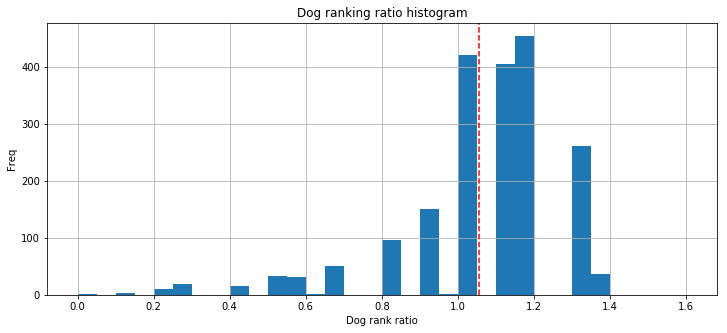

In [78]:
# Visualizations for frequency of dogs rating 
plt.hist(tae_clean['rating_ratio'], bins=np.arange(min(tae_clean['rating_ratio']), max(tae_clean['rating_ratio']) + 0.25, 0.05))
plt.xlabel('Dog rank ratio')
plt.ylabel('Freq')
plt.title('Dog ranking ratio histogram');
plt.grid(True)
plt.axvline(tae_clean['rating_ratio'].mean(), color = 'r', linestyle = '--')
plt.show()

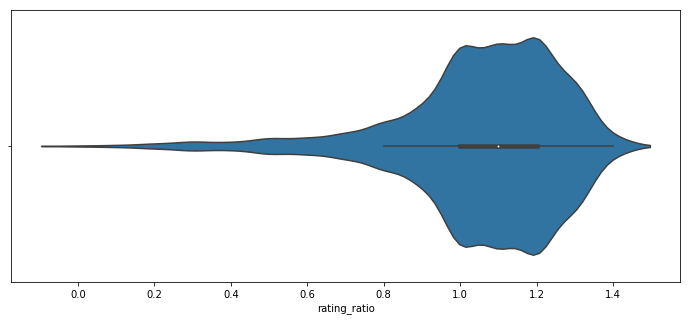

In [79]:
## another visualization in the form of violinplot
sns.violinplot(x = "rating_ratio", data=tae_clean)
plt.show()

In [80]:
tae_clean.rating_ratio.median()

1.1

Insights:  
Most frequent ranking ratio are between 1 and 1.2 with the median at 1.1

Interquartile range between 1 and 1.2

95% confidence interval between 0.8 and 1.4

### Retweet ount versus favorite count
we expect high correlation between retweet count and favorite count

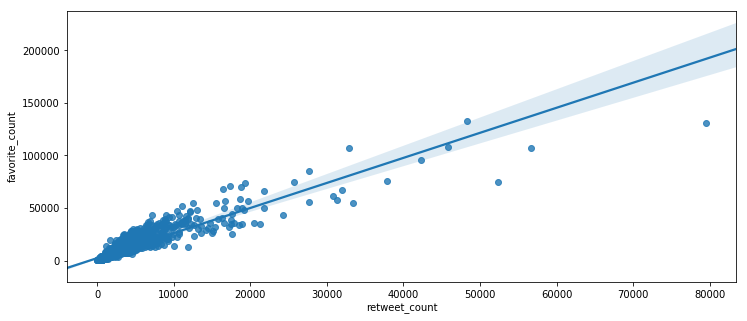

In [81]:
sns.regplot(x="retweet_count", y="favorite_count", data=tae_clean)

The plot confirms our expectation, there is a strong correlation between retweets and favorite counts.
I will run correlation coefficient between the two

In [82]:
np.corrcoef(tae_clean.retweet_count,tae_clean.favorite_count)

array([[1.       , 0.9130004],
       [0.9130004, 1.       ]])

We can see a strong positive correlation between favorite count and retweet count

Insight:  
Tweets with high retweet count often have high favorite count

### Retweet count to rating ratio 

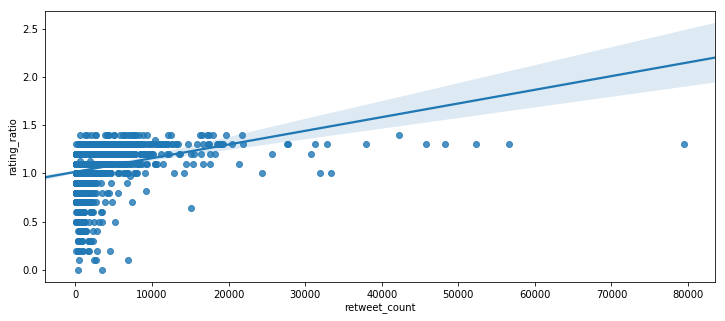

In [83]:
## Plotting retweet count to rating ratio
sns.regplot(x="retweet_count", y="rating_ratio", data=tae_clean)

In [84]:
np.corrcoef(tae_clean.retweet_count,tae_clean.rating_ratio)

array([[1.        , 0.30288811],
       [0.30288811, 1.        ]])

Insight: 
The dogs with the highest retweet count have high rating ratio. most extreme retweet counts are around the 1.4 rating ratio level.

### Visualization- distribution by dog type

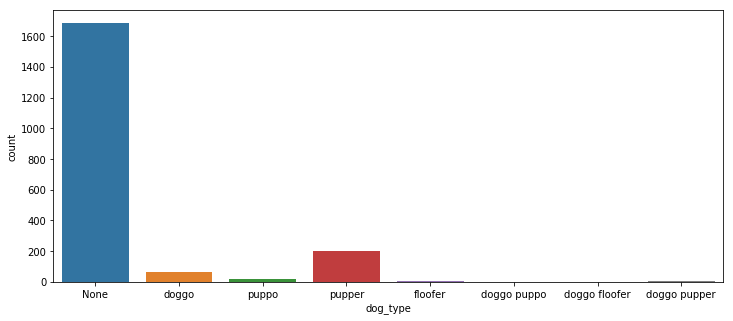

In [85]:
# Bar plot of distribution of dog types\
sns.countplot(data = tae_clean, x = 'dog_type', orient = 'h')

Insight:
Running the count plot we can most dogs are unassigned to a specific dog type

from the assigned dogs we can see 'pupper' is the most common dog type, followed by 'doggo'

### Dog rating analysis by dog type

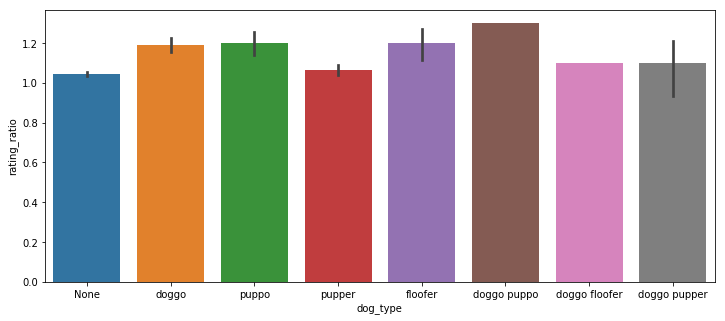

In [86]:
sns.barplot(x='dog_type',y='rating_ratio', data=tae_clean)

Insight:
The barplot shows that on average dogs with an assigned type have higher rating than non assigned dogs

"Pupper" which is the most frequent of the "assigned" dogs has the lowest average rating ratio.

### Visualization- rating by gender

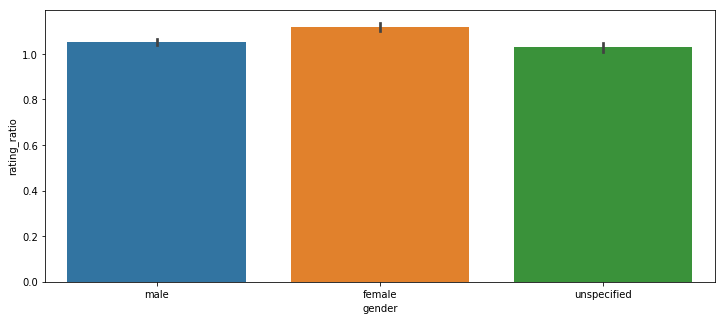

In [87]:
## Plotting rating_ratio by gender
sns.barplot(x='gender',y='rating_ratio', data=tae_clean)

Inisght:
From the plot it can be seen that females receive higher rating on average, followed by males and then by unspecified gender which receive the lowest average ratings